<a href="https://colab.research.google.com/github/JarvisSan22/OpenCV_Design/blob/main/OpenCV_AutoPattenDesign_20210402.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


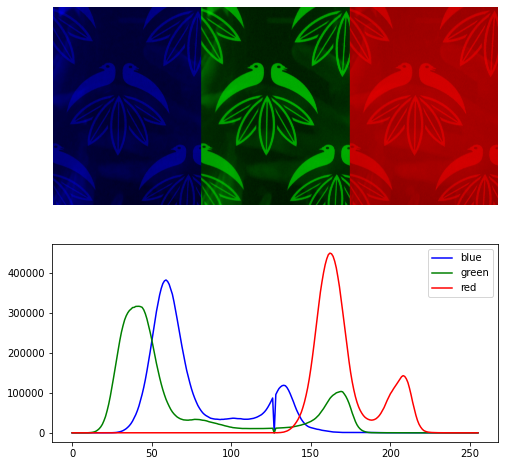

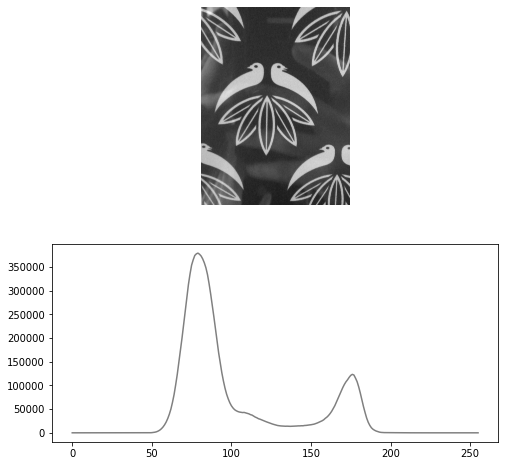

In [ ]:
#画像の解析
def RBGhist(img):
  h,w,c=img.shape
  #RBGのヒストグラム
  fig,axs=plt.subplots(2,1,figsize=(8,8))
  #monoのimgsを作成する
  RBG_imgs=[]
  colors=["blue","green","red"]
  for coli,col in zip(range(c),colors):
    #monoの画像
    img_c=np.zeros((h,w,c),dtype=np.uint8)
    img_c[:,:,coli]=img[:,:,coli]
    RBG_imgs.append(img_c)
    #色によりヒストグラム
    hist_c=cv2.calcHist([img],[coli],None,[256],[1,255])
    axs[1].plot(hist_c,color=col,label=col)

  RBG_monos=cv2.hconcat(RBG_imgs)
  axs[0].imshow(cv2.cvtColor(RBG_monos,cv2.COLOR_BGR2RGB))
  axs[0].set_axis_off()
  axs[1].legend()
  plt.show()

def grayhist(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray_hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])
  fig,axs=plt.subplots(2,1,figsize=(8,8))
  axs[0].imshow(img_gray,cmap="gray")
  axs[0].set_axis_off()
  axs[1].plot(img_gray_hist,color="gray")

RBGhist(img)
grayhist(img)


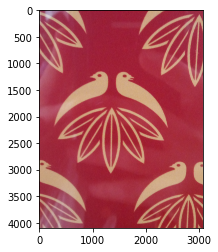

In [ ]:
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/Photos/print_1.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

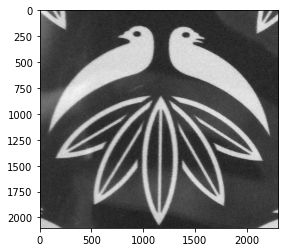

In [ ]:
plt.imshow(cv2.cvtColor(img[1000:3100,200:2500,:], cv2.COLOR_BGR2GRAY),cmap="gray")

In [ ]:
#Crop and Gray Scale 
img_crop=img[1000:3100,200:2500,:]
img_crop_gray=cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)

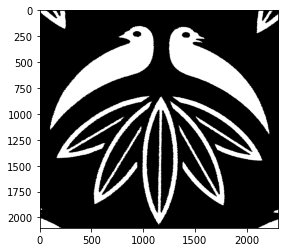

In [ ]:
#Binary
thresh, binary = cv2.threshold (img_crop_gray, 140, 180, cv2.THRESH_BINARY)
plt.imshow(binary, cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2100, 2300, 3)


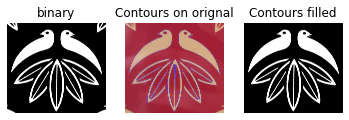

In [ ]:

def ExtractContours(img,graythresholds,topcuts,sidecuts,plot=True):
  img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #Binary
  thresh, binary = cv2.threshold (img_gray, graythresholds[0], graythresholds[1], cv2.THRESH_BINARY)
  
  #輪郭の抽出と描画 cv2findControus
  contours, hierarchy = cv2.findContours( binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  im2_draw_line = np.copy(img)
  contour_list=[] 
  for contour in contours:
    #print(contour)
    
    c_area=cv2.contourArea(contour)
    if c_area>100:
      m=contour.mean(axis=0)[0]
   
      if ((m[0]<topcuts[0]) or (m[0]>topcuts[1]))&((m[1]<sidecuts[0]) or (m[1]>sidecuts[1]))==False:
        #print(len(contour),c_area)
        #print(contour.shape)
        contour_list.append(contour)
        #continue
        cv2.polylines(im2_draw_line,contour,True,(255,0,0),3)
  # 輪郭線の入った画像を表示
  #Turn Contours into img
  w,h,c=img_crop.shape
  img_pl = np.zeros((w,h,c))
  cv2.fillPoly(img_pl,pts=contour_list,color=(255,255,255))
  print(img_pl.shape)
  if plot:
      fig,axs=plt.subplots(1,3)
      axs[0].imshow(binary, cmap="gray")
      axs[0].set_title("binary")
      axs[1].imshow(cv2.cvtColor(im2_draw_line, cv2.COLOR_BGR2RGB))
      axs[1].set_title("Contours on orignal")
      axs[2].imshow(img_pl)
      axs[2].set_title("Contours filled")
      for ax in axs:
        ax.axis('off')
  return img_pl

graythresholds=[140,180]
topcuts=[200,1500]
sidecuts=[200,1700]
img_pl=ExtractContours(img_crop,graythresholds,topcuts,sidecuts)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


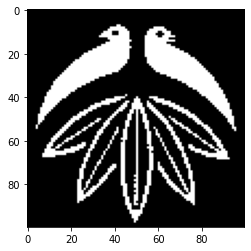

In [ ]:
#Resize サイズを縮む
rx,ry=100,100
resize=(rx,ry)
img_pl_resize=cv2.resize(img_pl,resize)
plt.figure()
plt.imshow(img_pl_resize)

手ぬぐいを作成する

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


error: ignored

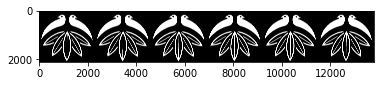

In [ ]:

#Hstack と Vstackの方法
h_n=6 #Horizontal number 
h_img_stack=[]
for n in range(h_n):  
  h_img_stack.append(img_pl)
h_img=cv2.hconcat(h_img_stack)
plt.figure()
plt.imshow(h_img)
w,h,c=img_pl_resize.shape

v_n=5
v_img_stack=[]
for n in range(v_n):
  if n% 2 ==0:
    M = np.float32([[1, 0, w//2], [0, 1, 0]])
    size=np.shape(h_img)[0:2]
    h_img_translated= cv2.warpAffine(h_img,M,size)
    v_img_stack.append(h_img_translated)
  else:

    cv2.copyMakeBorder(h_img,0,0,0, w//2,cv2.BORDER_CONSTANT)
    v_img_stack.append(h_img)

hv_img=cv2.vconcat(v_img_stack)
print(hv_img.shape)



In [ ]:
#ゼロのArreyに加える方法
def CmtoPx(cm):
  #https://www.unitconverters.net/typography/centimeter-to-pixel-x.htm
  return int(cm*37.7952755906)


def CreatePatten(img_pl_resize,hcm,wcm,padcm,buff_w=20,buff_h=20,plot=True):
  bhcm=hcm+padcm #cm #66
  bwcm=wcm+padcm #cm #36
  base_array=np.zeros((CmtoPx(bhcm),CmtoPx(bwcm),3),dtype=np.uint8)
  
  bh,bw,c=base_array.shape
   
  h,w,c=img_pl_resize.shape

  h_n=bh//w
  w_n=bw//h
  #print(h_n,bh)
  #print(w_n,bw)
  
  img_cut_h=h
  img_cut_w=w
  #最初の位置
  wp=0
  hp=0
  
  #画像の間に間隔
  #buff_w=buff_w
  #buff_h=buff_h
  for i in range(h_n):
    for j in range(w_n):
      try:
        if i % 2 ==0:   
          base_array[hp:hp+h,wp+50:wp+w+50,:]=img_pl_resize[:,:,:]  
        else:
          base_array[hp:hp+h,wp:wp+w,:]=img_pl_resize[:,:,:]  
      except:
        pass
      wp+=w+buff_w
    wp=0
    hp+=h+buff_h



  #Cut to 手ぬぐい
  thpx=CmtoPx(hcm)
  twpx=CmtoPx(wcm)
  croped_array=base_array[(bh-thpx)//2:bh-(bh-thpx)//2,(bw-twpx)//2:bw-(bw-twpx)//2,:]
  if plot==True:
    plt.figure(figsize=(10,15))
    plt.imshow(croped_array)
  return croped_array



2721 1511


28 2872
16 1662


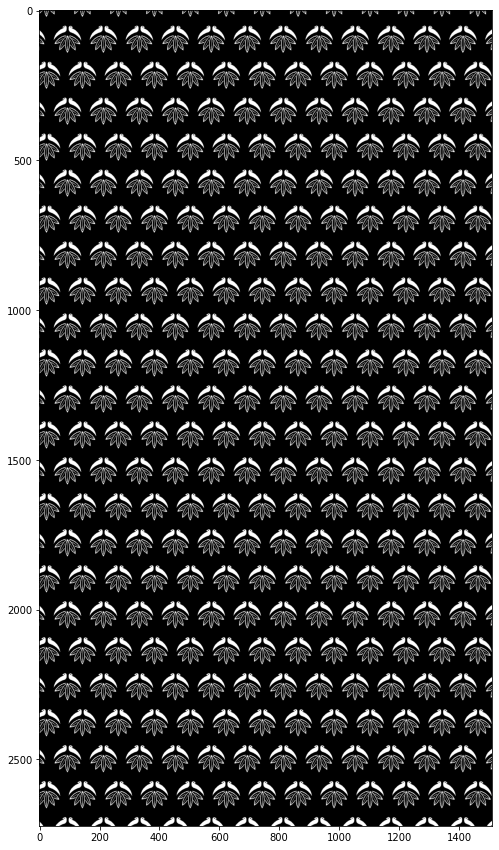

In [ ]:
hcm=72 #cm #66
wcm=40 #cm #36
padcm=4

Pattern=CreatePatten(img_pl_resize,hcm,wcm,padcm)

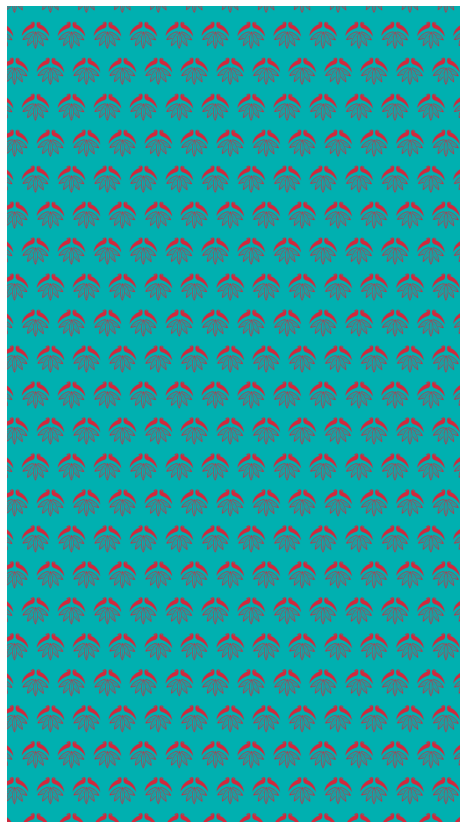

In [ ]:

def colorpatten(pattern,black_color,white_color,plot=True):
  colored_patten=pattern.copy()
  maskc1= colored_patten==[0,0,0]
  colored_patten[np.logical_or.reduce(maskc1,axis=2)]=white_color
  maskc2=pattern[:,:,:]==[255,255,255]
  colored_patten[np.logical_or.reduce(maskc2,axis=2)]=black_color
  if plot==True:
    plt.figure(figsize=(10,15))
    plt.imshow( colored_patten)
    plt.axis('off')
  return colored_patten


#白と黒は色に変更する
#https://www.color-hex.com/color-palette/33555
c2=[0,176,176]
c1=[210,40,60]
Colored_Patten=colorpatten(Pattern,c1,c2)

error: ignored

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True]])